In [17]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
%matplotlib inline

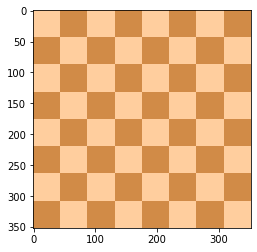

In [3]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

plt.imshow(flat_chess)

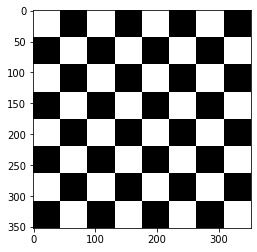

In [5]:
gray_flat_chess = cv2.imread('../DATA/flat_chessboard.png')
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_flat_chess, cmap='gray')

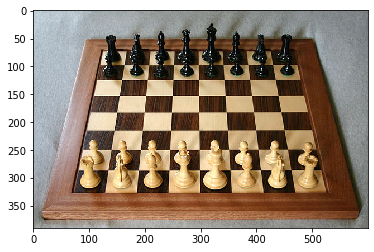

In [13]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

plt.imshow(real_chess)

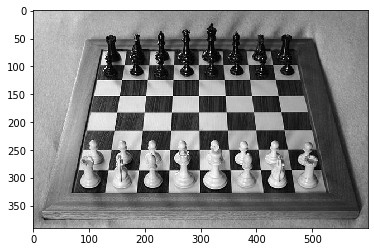

In [14]:
gray_real_chess = cv2.imread('../DATA/real_chessboard.jpg')
gray_real_chess = cv2.cvtColor(gray_real_chess, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_real_chess, cmap='gray')

In [19]:
gray = np.float32(gray_flat_chess)
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [36]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)


dst = cv2.dilate(dst,None)

flat_chess[dst>0.01*dst.max()] = [255,0,0]

print((dst>0.01*dst.max()).shape)


(352, 352)


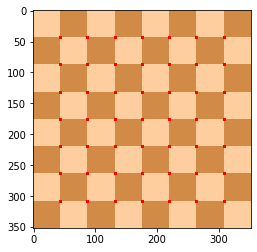

In [26]:
plt.imshow(flat_chess)

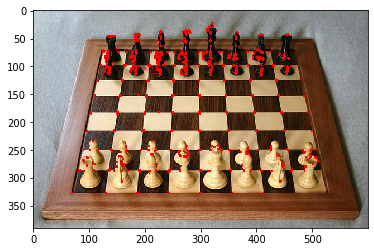

In [37]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

dst = cv2.dilate(dst,None)

real_chess[dst>0.01*dst.max()] = [255,0,0]

plt.imshow(real_chess)


In [41]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
real_flat_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [56]:
# 2nd positional argument is the number of best corners to find
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 100, 0.01, 10)

corners = np.int0(corners)


In [57]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x,y),3, (255,0,0), -1)

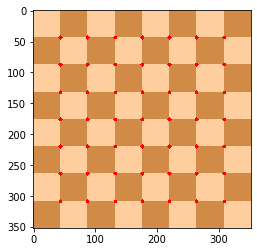

In [58]:
plt.imshow(flat_chess)

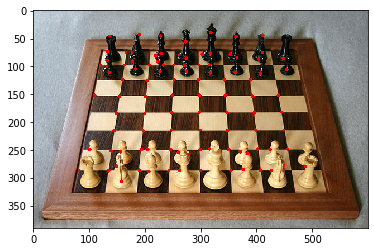

In [60]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01,10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x,y),3, (255,0,0), -1)
    
plt.imshow(real_chess)
